# Gerardo de Miguel González

## Práctica 2 de Estadística para Data Science

### Problema 1 

*Considera un examen de 10 preguntas con 5 posibles respuestas para cada pregunta en el que se responde al azar. Considera la variable aleatoria X =número de preguntas acertadas en el examen.*

**::GMG::** El problema que se plantea es un problema en el que se *una persona* realiza **10 experimentos** (responder cada una de las preguntas del examen) en *cada uno* de los cuales puede tener éxito (acertar la pregunta) o no (fallar).

La **variable aleatoria discreta** que se asigna para modelar el resultado global es el *número de preguntas acertadas* (número de éxitos). Individualmente cada pregunta tiene **5 posibles respuestas**, *una de las cuales* es la correcta por lo que la probabilidad de acertar (éxito) una pregunta es: 

$p = 1/5$

Dentro del marco de la *teoría de probabilidad* y las *variables aleatorias discretas* cada pregunta del examen es un **experimento de Bernoulli** con probabilidad de éxito `p` que es repetido *10 veces* de forma *independiente* y en el que modelamos el número de sucesos (preguntas acertadas) durante los 10 experimentos como una variable aleatoria `X` que es un **experimento binomial**.

Por lo tanto vamos a usar una **distribución binomial** para modelar y hacer los cálculos.

**::GMG::** Referencias

- 4.3. Distribución de Bernoulli y 4.4. Distribución binomial en apuntes de estadística (pdf) pp. 27-28
- distribuciones.R (script)
- [Comandos de R](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Binomial.html): dbinom (pmf), pbinom (cdf), qbinom ($cdf^{-1}$)

i) ¿Cuánto valen E(X) y SD(X)?

**::GMG::** Lo tenemos ya calculado en los apuntes pp. 28

$$E(X) = np$$

$$Var(X) = np(1 - p)$$

y por definición pp. 21:

$$E \left( X \right) = \sum_{k=1}^\infty x_i p \left( x_i \right)$$

$$Var \left( X \right) =  E \left( X^2 \right) - \left( E \left( X \right) \right)^2$$

$$SD \left( X \right) = \sqrt {Var \left( X \right)}$$

In [1]:
#::GMG::Directamente con las fórmulas de los apuntes
# número de experimentos de Bernoulli
n <- 10
# Probabilidad de éxito por pregunta
p <- 1/5
# E(X)
E.X <-  n * p
# Var(X)
Var.X <- n * p * (1-p)
SD.X = sqrt(Var.X)
paste('E(X)=', E.X)
paste('SD(X)=',round(SD.X,3))

[1] "E(X)= 2"

[1] "SD(X)= 1.265"

In [2]:
#::GMG::Si aplicamos la definición de E(X) y SD(X) también se puede calular con R porque es
#       un sumatorio, i.e. sum() y tenemos la pmf p(x) que es dbinom()
exitos <- 0:10
E.X.2 <- sum(exitos*dbinom(x = exitos,size = n,prob = p))
paste('E(X)=', E.X.2)
Var.X.2 <- sum(exitos^2*dbinom(x = exitos,size = n,prob = p)) -
           E.X.2^2
paste('SD(X)=',round(sqrt(Var.X.2),3))

[1] "E(X)= 2"

[1] "SD(X)= 1.265"

ii) Calcula la probabilidad de acertar 0, 1, 2, ..., 10 preguntas. ¿Cuánto vale la suma de las
once probabilidades que acabas de calcular?

**::GMG::** Conceptualmente en una distribución discreta como la binomial se puede calcular la probabilidad de un evento discreto con la `pmf`:

$$P \left(X = x_i \right) = dbinom \left( x =  x_i, size = 10, prob = 1/5 \right)$$ 

y la suma de probabilidades hasta un evento dado es la probabilidad de que todos los eventos hasta ese incluido se haya producido y se puede calcular con la `cdf`:

$$P \left(X \leq x_i \right) = pbinom \left( x = x_i, size = 10, prob = 1/5 \right)$$

La suma de las probabilidades de *todos* los eventos $x_i = \{0,1,2,...10\}$ tiene que dar **1**. Si se hace con `pmf` y `sum()` o `cdf` tiene dar *lo mismo*.

In [3]:
#::GMG::calculamos las probabilidades de eventos individuales
probabilidades <- dbinom(x = exitos,size = n,prob = p)

In [4]:
# https://stackoverflow.com/questions/4071586/printing-newlines-with-print-in-r
print(paste('p(x =',exitos,'):',probabilidades))

 [1] "p(x = 0 ): 0.1073741824"         "p(x = 1 ): 0.268435456"         
 [3] "p(x = 2 ): 0.301989888"          "p(x = 3 ): 0.201326592"         
 [5] "p(x = 4 ): 0.088080384"          "p(x = 5 ): 0.0264241152"        
 [7] "p(x = 6 ): 0.005505024"          "p(x = 7 ): 0.000786432"         
 [9] "p(x = 8 ): 7.37280000000002e-05" "p(x = 9 ): 4.09599999999999e-06"
[11] "p(x = 10 ): 1.024e-07"          


In [5]:
#::GMG::La suma de las probabilidades de todos los eventos es 1
suma <- sum(probabilidades)
paste('La suma p(x_i) es:', suma)

[1] "La suma p(x_i) es: 1"

In [6]:
#::GMG::Cálculo directo con la cdf
probabilidad <- pbinom(q = 10,size = n,prob = p)
paste('La probabilidad p(X <= 10) es:', probabilidad)

[1] "La probabilidad p(X <= 10) es: 1"

iii) Calcula las probabilidades acumuladas, es decir la probabilidad de obtener 0 aciertos o
menos, 1 acierto o menos, 2 aciertos o menos ... 10 aciertos o menos.

In [7]:
#::GMG:: uso la cdf aquí para todos los eventos
p.acumuladas <- pbinom(q = exitos,size = n,prob = p)
print(paste('p(x <=',exitos,'):',p.acumuladas))

 [1] "p(x <= 0 ): 0.1073741824" "p(x <= 1 ): 0.3758096384"
 [3] "p(x <= 2 ): 0.6777995264" "p(x <= 3 ): 0.8791261184"
 [5] "p(x <= 4 ): 0.9672065024" "p(x <= 5 ): 0.9936306176"
 [7] "p(x <= 6 ): 0.9991356416" "p(x <= 7 ): 0.9999220736"
 [9] "p(x <= 8 ): 0.9999958016" "p(x <= 9 ): 0.9999998976"
[11] "p(x <= 10 ): 1"          


iv) Representa las probabilidades de los apartados anteriores en una gráfica con dos paneles. Guarda la figura en un archivo. ¿Cuál es el número de aciertos más probable?

**::GMG::** El número de aciertos más probable es **2** que coincide con $E \left( X \right)$

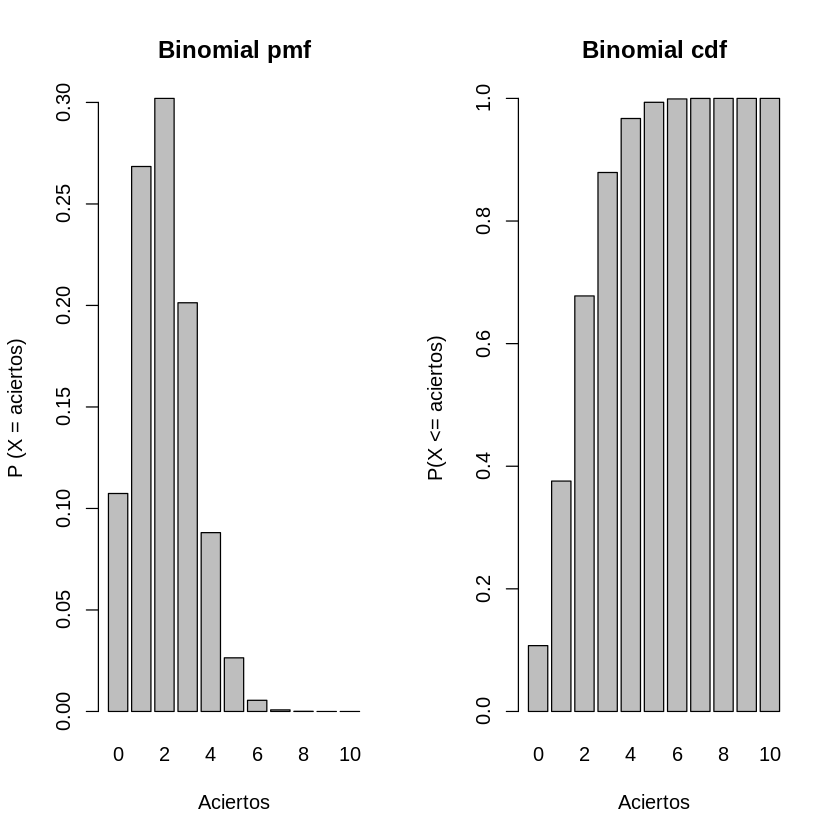

In [8]:
#::GMG::Hemos aprendido en clase que para representar valores discretos de forma gráfica
#       tenemos barplot
# https://stackoverflow.com/questions/17759540/r-graph-of-binomial-distribution
par(mfrow=c(1,2))
barplot(probabilidades, names.arg = exitos, 
        xlab = "Aciertos", 
        ylab = "P (X = aciertos)", 
        main = "Binomial pmf")
barplot(p.acumuladas, names.arg = exitos, 
        xlab = "Aciertos", 
        ylab = "P(X <= aciertos)", 
        main = "Binomial cdf")

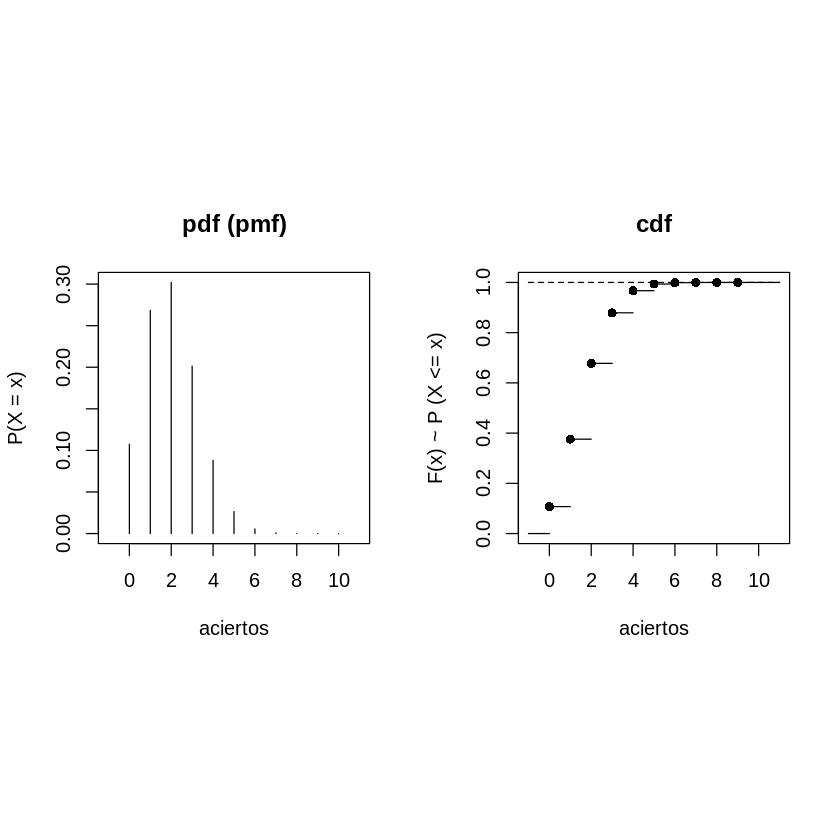

In [10]:
#::GMG::No obstante he visto también que se hacen gráficos de líneas con plot() lines()
#       y segment()
# Por ejemplo en pp. 118
# https://books.google.es/books/about/Probability_and_Statistics_with_R.html?id=4acZAQAAIAAJ&source=kp_book_description&redir_esc=y
par(mfrow = c(1,2), pty = 's')
plot(exitos,dbinom(x = exitos,size = n,prob = p), type = 'h', 
     xlab = 'aciertos', ylab = 'P(X = x)',
     xlim = c(-1,length(exitos)),
     main = 'pdf (pmf)'
    )
plot(exitos,pbinom(q = exitos,size = n,prob = p), type = 'n',
     xlab = 'aciertos', ylab = 'F(x) ~ P (X <= x)',
     xlim = c(-1,length(exitos)), ylim = c(0,1),
     main = 'cdf'
    )
segments(-1,0,0,0)
segments(exitos, pbinom(q = exitos,size = n,prob = p),
         exitos + 1, pbinom(q = exitos,size = n,prob = p))
lines(exitos[-length(exitos)], 
      pbinom(q = exitos[-length(exitos)],size = n,prob = p),
      type = 'p', pch = 16)
segments(-1,1,length(exitos),1, lty = 2)

## Problema 2 

*En el archivo GOT.txt figura el número de muertes por cada uno de los 67 primeros capítulos de la serie Juego de Tronos.*

In [14]:
#::GMG::Cargo el dataset para trabajar con él
headers = read.csv(file = 'GOT.txt',  skip = 0, header = FALSE, 
                   nrows = 1, as.is = TRUE, strip.white = TRUE, 
                   sep = ' ')
got <- read.csv(file = 'GOT.txt', skip = 2, header = FALSE, sep = ' ')
colnames(got)= headers

In [15]:
print(paste(class(got),'with',ncol(got),'columns and',nrow(got),'rows.'))
print('Description:')
str(got)

[1] "data.frame with 3 columns and 66 rows."
[1] "Description:"
'data.frame':	66 obs. of  3 variables:
 $ Season   : int  1 1 1 1 1 1 1 1 1 2 ...
 $ Episode  : int  2 3 4 5 6 7 8 9 10 1 ...
 $ NumDeaths: int  3 0 1 5 4 2 7 2 3 2 ...


i) Razona qué distribución usarías para calcular probabilidades asociadas a esta variable. Representa gráficamente los datos correspondientes al número de muertes de forma que te ayude a decidir qué distribución usar.

ii) Estima la probabilidad de que en el siguiente capítulo haya más de 5 muertes. Explica qué suposiciones has hecho. ¿Podría fallar alguna de las suposiciones?

iii) Calcula la probabilidad de que en el siguiente capítulo haya exactamente 0, 1, 2, ..., 10 muertes. Representa las probabilidades en una gráfica. ¿Cuál es el número de muertes más probable? ¿Cuánto vale la suma de las once probabilidades? ¿Por qué?

iv) ¿Cu ́anto valen E(X) y SD(X)? Explica su significado en este contexto.

### Problema 3 

*Estamos esperando un tren que tiene programada su llegada en breves minutos. Definimos la variable aleatoria X como el tiempo de espera en minutos. La variable aleatoria X tiene función densidad de probabilidad:* 

f(x) = hx si x ∈ [0, 1), f(x) = h si x ∈ [1, 5),
f(x) = h (6 − x) si x ∈ [5, 6], y f(x) = 0 en los demás casos.

i) Representa gráficamente f(x) y calcula la constante h.

ii) Calcula P (X < 1), P (X ≤ 1), P (0 < X ≤ 3)

iii) ¿Cuánto vale E(X)?

### Problema 4 

*El colesterol se mide en una población con media 180 mg/dL y desviacón típica 25 mg/dL.*

**::GMG::** Asumo distribución normal con media = mu y desviacion tipica = sigma

In [ ]:
mu <- 180 # mg/dL
sigma <- 25 # mg/dL

i)  Calcula la probabilidad de que una persona tenga más de 225 mg/dL de colesterol en sangre.

In [ ]:
p_mas_de <- 1 - pnorm(q = 225, mean = mu, sd = sigma)
print(paste("Probabilidad de que una persona tenga más de 225 mg/dL: ", p_mas_de))

ii)  Calcula el percentil del 95% de colesterol en sangre en dicha población.

In [ ]:
percentil <- 0.95
qnorm(p = percentil,mean = mu,sd = sigma)

iii) Representa la función de densidad y la función de distribución en una gráfica con dos paneles.

In [ ]:
xseq <- seq(0,12*sigma,.5)
dens <- dnorm(x = xseq,mean = mu,sd = sigma)
dist <- pnorm(q = xseq,mean = mu,sd = sigma)

In [ ]:
par(mfrow=c(1,2), mar=c(3,4,4,2))
plot(xseq, dens, col="darkgreen",
     xlab="", ylab="fdp", 
     type="l",lwd=2, cex=2, 
     main="fdp colesterol (Normal)", cex.axis=.8)
plot(xseq, dist, col="darkorange", 
     xlab="", ylab="FDP",
     type="l",lwd=2, cex=2, 
     main="FDP colesterol (Normal)", cex.axis=.8)

iv) ¿Cuánto valen E(X) y SD(X)?